### Import Library

In [31]:
import numpy as np
import numpy.linalg as LA
import pandas as pd
import sklearn as sk
import itertools
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,make_scorer,precision_score,recall_score,roc_auc_score,f1_score
from sklearn.ensemble import VotingClassifier
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from scipy.spatial import distance
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
import pickle
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DataConversionWarning)


UsageError: Line magic function `%` not found.


In [2]:
RCI_loc='C://Users//t8828fa//Desktop//Personal//Higher Study//Phd//Study Material//Research Work//RCI//896 Records_v10.csv'
#RCI_loc='C://Users//t8828fa//Desktop//Personal//Higher Study//Phd//Study Material//Research Work//RCI//896 Imputed Symtomatic.xlsx'

Required_column_list=['Record ID','Status','Location', 'Region','Size Category (NB)','Age Category (Standard)', 'Diabetes', 
              'Hypertension','Heart Disease', 'COPD', 'Polycystic Kidney Disease', 'Smoking History',
              'Multiple Aneurysms',  'Side', 'Family History','Race','diplopia', 'blurred vision']

RCI_features= ['Location', 'Region','Size Category (NB)','Age Category (Standard)', 'Diabetes', 
              'Hypertension','Heart Disease', 'COPD', 'Polycystic Kidney Disease', 'Smoking History',
              'Multiple Aneurysms',  'Side', 'Family History','Race','diplopia', 'blurred vision']

RCI_label=['Status']

# Read the file
df_RCI=pd.read_csv(RCI_loc)

# Get only required column
df_RCI=df_RCI[Required_column_list]

# Set Index
df_RCI.set_index('Record ID',inplace=True)



### Replace missing Smoking History by unknown

In [3]:
def impute_Smoking_History(cols):
    Smoking_History = cols[0]
    
    if pd.isnull(Smoking_History):
        return 'NA'
    else:
        return Smoking_History
    
df_RCI['Smoking History'] = df_RCI[['Smoking History']] .apply(impute_Smoking_History,axis=1)

### Label Encoding for Unbalance Dataset

In [4]:
df_RCI_X=df_RCI[RCI_features]
df_RCI_Y=df_RCI[RCI_label]
df_RCI_X_encoded= df_RCI_X.copy()


encode = {}
for column in df_RCI_X_encoded.columns:
        if df_RCI_X_encoded.dtypes[column] == np.object:
            encode[column] = LabelEncoder()
            df_RCI_X_encoded[column] = encode[column].fit_transform(df_RCI_X_encoded[column])

### Balance Dataset using under sampling technique

In [5]:
no_Ruptured = len(df_RCI[df_RCI['Status'] == 'Ruptured'])
unruptured_indices = df_RCI[df_RCI['Status'] == 'Un-Ruptured'].index
random_indices = np.random.choice(unruptured_indices,no_Ruptured,replace=False)
ruptured_indices = df_RCI[df_RCI['Status'] == 'Ruptured'].index
under_sample_indices = np.concatenate([ruptured_indices,random_indices])
df_RCI_balanced = df_RCI.loc[under_sample_indices]

In [6]:
df_RCI_balanced_X=df_RCI_balanced[RCI_features]
df_RCI_balanced_Y=df_RCI_balanced[RCI_label]

In [7]:
# Best Performing balance dataset
#df_RCI_balanced.to_csv('Base_model_balanced_dataset.csv')

## Read Balance Dataset from here always 

In [165]:
df_RCI_balanced=pd.read_csv('Base_model_balanced_dataset.csv')
df_RCI_balanced.rename(index=str, columns={"Size Category (NB)": "Size",
                                'Age Category (Standard)':"Age"  
                                      
                                      },inplace=True)

df_RCI_balanced_X.rename(index=str, columns={"Size Category (NB)": "Size",
                                'Age Category (Standard)':"Age"  
                                      
                                      },inplace=True)

### Create Label Encoder for balance data set

In [166]:
df_RCI_X_balanced_encoded= df_RCI_balanced_X.copy()

encode = {}
for column in df_RCI_X_balanced_encoded.columns:
        if df_RCI_X_balanced_encoded.dtypes[column] == np.object:
            encode[column] = LabelEncoder()
            df_RCI_X_balanced_encoded[column] = encode[column].fit_transform(df_RCI_X_balanced_encoded[column])

In [167]:
X_train_b, X_val_b, y_train_b, y_val_b = train_test_split(df_RCI_X_balanced_encoded, 
                                                    df_RCI_balanced_Y, test_size=0.20, 
                                                    random_state=101)

### Load All the trained Model

In [168]:
log_b =pickle.load(open('log_b', 'rb'))
dtree_b =pickle.load(open('dtree_b', 'rb'))
rfc_b =pickle.load(open('rfc_b', 'rb'))
adaboost_b =pickle.load(open('adaboost_b', 'rb'))
Gboost_b=pickle.load(open('Gboost_b', 'rb'))
knn =pickle.load(open('knn', 'rb'))
svc_b =pickle.load(open('svc_b', 'rb'))


### Logistic Regression

In [170]:
log_b = LogisticRegression(random_state=101)
log_b.fit(X_train_b, y_train_b)
log_pred_b = log_b.predict(X_val_b)
print(confusion_matrix(y_val_b,log_pred_b))
print(classification_report(y_val_b,log_pred_b))
print('Accuracy' ,accuracy_score(y_val_b,log_pred_b))

'''

[[63 13]
 [28 45]]
              precision    recall  f1-score   support

           0       0.69      0.83      0.75        76
           1       0.78      0.62      0.69        73

    accuracy                           0.72       149
   macro avg       0.73      0.72      0.72       149
weighted avg       0.73      0.72      0.72       149

Accuracy 0.7248322147651006
'''

[[45 28]
 [13 63]]
              precision    recall  f1-score   support

    Ruptured       0.78      0.62      0.69        73
 Un-Ruptured       0.69      0.83      0.75        76

    accuracy                           0.72       149
   macro avg       0.73      0.72      0.72       149
weighted avg       0.73      0.72      0.72       149

Accuracy 0.7248322147651006


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


'\n\n[[63 13]\n [28 45]]\n              precision    recall  f1-score   support\n\n           0       0.69      0.83      0.75        76\n           1       0.78      0.62      0.69        73\n\n    accuracy                           0.72       149\n   macro avg       0.73      0.72      0.72       149\nweighted avg       0.73      0.72      0.72       149\n\nAccuracy 0.7248322147651006\n'

### Hypertuning Logistic Regression - Same accuracy as above

In [144]:
'''
# Create logistic regression
logistic = LogisticRegression()
# Create regularization penalty space
penalty = ['l1', 'l2']
# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)
# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)
# Create grid search using 5-fold cross validation
clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)
# Fit grid search
log_best_model = clf.fit(X_train_b, y_train_b)
log_best_model_pred_b = log_best_model.predict(X_val_b)
print(confusion_matrix(y_val_b,log_best_model_pred_b))
print(classification_report(y_val_b,log_best_model_pred_b))
print('Accuracy' ,accuracy_score(y_val_b,log_best_model_pred_b))

'''

"\n# Create logistic regression\nlogistic = LogisticRegression()\n# Create regularization penalty space\npenalty = ['l1', 'l2']\n# Create regularization hyperparameter space\nC = np.logspace(0, 4, 10)\n# Create hyperparameter options\nhyperparameters = dict(C=C, penalty=penalty)\n# Create grid search using 5-fold cross validation\nclf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)\n# Fit grid search\nlog_best_model = clf.fit(X_train_b, y_train_b)\nlog_best_model_pred_b = log_best_model.predict(X_val_b)\nprint(confusion_matrix(y_val_b,log_best_model_pred_b))\nprint(classification_report(y_val_b,log_best_model_pred_b))\nprint('Accuracy' ,accuracy_score(y_val_b,log_best_model_pred_b))\n\n"

### Decision Tree Classifier - Included

In [172]:
#dtree_b = DecisionTreeClassifier(random_state=101)
dtree_b.fit(X_train_b, y_train_b)
dtree_pred_b = dtree_b.predict(X_val_b)
dtree_pred_train_b = dtree_b.predict(X_train_b)
print(confusion_matrix(y_val_b,dtree_pred_b))
print(classification_report(y_val_b,dtree_pred_b))
print('Accuracy' ,accuracy_score(y_val_b,dtree_pred_b))
'''
[[48 28]
 [31 42]]
              precision    recall  f1-score   support

           0       0.61      0.63      0.62        76
           1       0.60      0.58      0.59        73

    accuracy                           0.60       149
   macro avg       0.60      0.60      0.60       149
weighted avg       0.60      0.60      0.60       149

Accuracy 0.6040268456375839
'''

[[48 25]
 [31 45]]
              precision    recall  f1-score   support

    Ruptured       0.61      0.66      0.63        73
 Un-Ruptured       0.64      0.59      0.62        76

    accuracy                           0.62       149
   macro avg       0.63      0.62      0.62       149
weighted avg       0.63      0.62      0.62       149

Accuracy 0.6241610738255033


'\n[[48 28]\n [31 42]]\n              precision    recall  f1-score   support\n\n           0       0.61      0.63      0.62        76\n           1       0.60      0.58      0.59        73\n\n    accuracy                           0.60       149\n   macro avg       0.60      0.60      0.60       149\nweighted avg       0.60      0.60      0.60       149\n\nAccuracy 0.6040268456375839\n'

### Random Forest Classfier - Included

In [173]:
#rfc_b = RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=101)
rfc_b.fit(X_train_b, y_train_b)
rfc_pred_b = rfc_b.predict(X_val_b)
rfc_pred_train_b = rfc_b.predict(X_train_b)
print(confusion_matrix(y_val_b,rfc_pred_b))
print(classification_report(y_val_b,rfc_pred_b))
print('Test Accuracy' ,accuracy_score(y_val_b,rfc_pred_b))
'''
[[58 18]
 [21 52]]
              precision    recall  f1-score   support

           0       0.73      0.76      0.75        76
           1       0.74      0.71      0.73        73

    accuracy                           0.74       149
   macro avg       0.74      0.74      0.74       149
weighted avg       0.74      0.74      0.74       149

Test Accuracy 0.738255033557047
'''

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


[[52 21]
 [18 58]]
              precision    recall  f1-score   support

    Ruptured       0.74      0.71      0.73        73
 Un-Ruptured       0.73      0.76      0.75        76

    accuracy                           0.74       149
   macro avg       0.74      0.74      0.74       149
weighted avg       0.74      0.74      0.74       149

Test Accuracy 0.738255033557047


'\n[[58 18]\n [21 52]]\n              precision    recall  f1-score   support\n\n           0       0.73      0.76      0.75        76\n           1       0.74      0.71      0.73        73\n\n    accuracy                           0.74       149\n   macro avg       0.74      0.74      0.74       149\nweighted avg       0.74      0.74      0.74       149\n\nTest Accuracy 0.738255033557047\n'

### Hypertuned Random Forest - Not Needed Same as above

In [174]:
RFC_params={'n_estimators': 233,
             'min_samples_split': 5,
             'min_samples_leaf': 1,
             'max_features': 'sqrt',
             'max_depth': 40,
             'bootstrap': True}

rfc_b = RandomForestClassifier(n_estimators=RFC_params['n_estimators'],
                               min_samples_split=RFC_params['min_samples_split'],
                               min_samples_leaf=RFC_params['min_samples_leaf'],
                               max_features=RFC_params['max_features'],
                               max_depth=RFC_params['max_depth'],
                               bootstrap=RFC_params['bootstrap'],
                               criterion='entropy',random_state=101)
rfc_b.fit(X_train_b, y_train_b)
rfc_pred_b = rfc_b.predict(X_val_b)
rfc_pred_train_b = rfc_b.predict(X_train_b)
print(confusion_matrix(y_val_b,rfc_pred_b))
print(classification_report(y_val_b,rfc_pred_b))
print('Test Accuracy' ,accuracy_score(y_val_b,rfc_pred_b))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


[[52 21]
 [18 58]]
              precision    recall  f1-score   support

    Ruptured       0.74      0.71      0.73        73
 Un-Ruptured       0.73      0.76      0.75        76

    accuracy                           0.74       149
   macro avg       0.74      0.74      0.74       149
weighted avg       0.74      0.74      0.74       149

Test Accuracy 0.738255033557047


### Hyper Tuning Random Forest - Already Hypertuned Parameter Above

In [ ]:


# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# First create the base model to tune
rfc = RandomForestClassifier()
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rfc_random.fit(X_train_b, y_train_b)
rfc_random_pred_b = rfc_random.predict(X_val_b)
print(confusion_matrix(y_val_b,rfc_random_pred_b))
print(classification_report(y_val_b,rfc_random_pred_b))
print('Accuracy' ,accuracy_score(y_val_b,rfc_random_pred_b))

rfc_random.best_params_


### Adaboost -Included

In [175]:
#adaboost_b = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=200,random_state=1,learning_rate=1)
adaboost_b.fit(X_train_b, y_train_b)
adaboost_b_pred = adaboost_b.predict(X_val_b)
adaboost_b_prob= adaboost_b.predict_proba(X_val_b)
print(confusion_matrix(y_val_b,adaboost_b_pred))
print(classification_report(y_val_b,adaboost_b_pred))
print('Accuracy' ,accuracy_score(y_val_b,adaboost_b_pred))

#print(adaboost_b_prob)
'''
[[61 15]
 [21 52]]
              precision    recall  f1-score   support

           0       0.74      0.80      0.77        76
           1       0.78      0.71      0.74        73

    accuracy                           0.76       149
   macro avg       0.76      0.76      0.76       149
weighted avg       0.76      0.76      0.76       149

Accuracy 0.7583892617449665
'''

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[52 21]
 [15 61]]
              precision    recall  f1-score   support

    Ruptured       0.78      0.71      0.74        73
 Un-Ruptured       0.74      0.80      0.77        76

    accuracy                           0.76       149
   macro avg       0.76      0.76      0.76       149
weighted avg       0.76      0.76      0.76       149

Accuracy 0.7583892617449665


'\n[[61 15]\n [21 52]]\n              precision    recall  f1-score   support\n\n           0       0.74      0.80      0.77        76\n           1       0.78      0.71      0.74        73\n\n    accuracy                           0.76       149\n   macro avg       0.76      0.76      0.76       149\nweighted avg       0.76      0.76      0.76       149\n\nAccuracy 0.7583892617449665\n'

### Gradient Boost  - Included

In [176]:
#Gboost_b = GradientBoostingClassifier(learning_rate=0.1,random_state=1,n_estimators=100,min_samples_split=5,min_samples_leaf=1,subsample=0.8,max_depth=3)
Gboost_b.fit(X_train_b, y_train_b)
Gboost_pred_b = Gboost_b.predict(X_val_b)
print(confusion_matrix(y_val_b,Gboost_pred_b))
print(classification_report(y_val_b,Gboost_pred_b))
print('Accuracy' ,accuracy_score(y_val_b,Gboost_pred_b))
'''
[[56 20]
 [19 54]]
              precision    recall  f1-score   support

           0       0.75      0.74      0.74        76
           1       0.73      0.74      0.73        73

    accuracy                           0.74       149
   macro avg       0.74      0.74      0.74       149
weighted avg       0.74      0.74      0.74       149

Accuracy 0.738255033557047
'''

[[54 19]
 [20 56]]
              precision    recall  f1-score   support

    Ruptured       0.73      0.74      0.73        73
 Un-Ruptured       0.75      0.74      0.74        76

    accuracy                           0.74       149
   macro avg       0.74      0.74      0.74       149
weighted avg       0.74      0.74      0.74       149

Accuracy 0.738255033557047


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


'\n[[56 20]\n [19 54]]\n              precision    recall  f1-score   support\n\n           0       0.75      0.74      0.74        76\n           1       0.73      0.74      0.73        73\n\n    accuracy                           0.74       149\n   macro avg       0.74      0.74      0.74       149\nweighted avg       0.74      0.74      0.74       149\n\nAccuracy 0.738255033557047\n'

### SVM - Not Needed

In [177]:
#svc_b = svm.SVC(C=1.0, kernel='rbf',probability=True,random_state=101)
svc_b.fit(X_train_b, y_train_b)
svc_pred_b = svc_b.predict(X_val_b)
print(confusion_matrix(y_val_b,svc_pred_b))
print(classification_report(y_val_b,svc_pred_b))
print('Accuracy' ,accuracy_score(y_val_b,svc_pred_b))
#print('AUC Score',roc_auc_score(y_val_b.values, svc_pred_b_prob))
'''
[[65 11]
 [34 39]]
              precision    recall  f1-score   support

           0       0.66      0.86      0.74        76
           1       0.78      0.53      0.63        73

    accuracy                           0.70       149
   macro avg       0.72      0.69      0.69       149
weighted avg       0.72      0.70      0.69       149

Accuracy 0.697986577181208
'''

[[39 34]
 [11 65]]
              precision    recall  f1-score   support

    Ruptured       0.78      0.53      0.63        73
 Un-Ruptured       0.66      0.86      0.74        76

    accuracy                           0.70       149
   macro avg       0.72      0.69      0.69       149
weighted avg       0.72      0.70      0.69       149

Accuracy 0.697986577181208


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


'\n[[65 11]\n [34 39]]\n              precision    recall  f1-score   support\n\n           0       0.66      0.86      0.74        76\n           1       0.78      0.53      0.63        73\n\n    accuracy                           0.70       149\n   macro avg       0.72      0.69      0.69       149\nweighted avg       0.72      0.70      0.69       149\n\nAccuracy 0.697986577181208\n'

### KNN- Included

In [178]:
#knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train_b, y_train_b)
KNN_pred_b=knn.predict(X_val_b)
print(confusion_matrix(y_val_b,KNN_pred_b))
print(classification_report(y_val_b,KNN_pred_b))
print('Accuracy' ,accuracy_score(y_val_b,KNN_pred_b))
'''
[[45 31]
 [18 55]]
              precision    recall  f1-score   support

           0       0.71      0.59      0.65        76
           1       0.64      0.75      0.69        73

    accuracy                           0.67       149
   macro avg       0.68      0.67      0.67       149
weighted avg       0.68      0.67      0.67       149

Accuracy 0.6711409395973155
'''

[[55 18]
 [31 45]]
              precision    recall  f1-score   support

    Ruptured       0.64      0.75      0.69        73
 Un-Ruptured       0.71      0.59      0.65        76

    accuracy                           0.67       149
   macro avg       0.68      0.67      0.67       149
weighted avg       0.68      0.67      0.67       149

Accuracy 0.6711409395973155


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


'\n[[45 31]\n [18 55]]\n              precision    recall  f1-score   support\n\n           0       0.71      0.59      0.65        76\n           1       0.64      0.75      0.69        73\n\n    accuracy                           0.67       149\n   macro avg       0.68      0.67      0.67       149\nweighted avg       0.68      0.67      0.67       149\n\nAccuracy 0.6711409395973155\n'

### Xgboost - Included

In [179]:
y_train_b=y_train_b['Status'].map({'Un-Ruptured' :0 ,'Ruptured':1})
y_val_b=y_val_b['Status'].map({'Un-Ruptured' :0 ,'Ruptured':1})

useTrainCV=True
cv_folds=7
early_stopping_rounds=50

#alg = XGBClassifier(learning_rate =0.1,n_estimators=1000,max_depth=5,min_child_weight=1,gamma=0,subsample=0.8,
#                    colsample_bytree=0.8,objective= 'binary:logistic',nthread=4,scale_pos_weight=1,seed=27,random_state=1)

xgb_param = alg.get_xgb_params()
xgtrain = xgb.DMatrix(X_train_b, label=y_train_b.values)
cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,metrics='auc', early_stopping_rounds=early_stopping_rounds)
alg.set_params(n_estimators=cvresult.shape[0])
    
#Fit the algorithm on the data
alg.fit(X_train_b, y_train_b,eval_metric='auc')
        
#Predict training set:
dtrain_predictions = alg.predict(X_train_b)
dtrain_predprob = alg.predict_proba(X_train_b)[:,1]
    
# Predict Test Set 
dtest_predictions = alg.predict(X_val_b)
dtest_predprob = alg.predict_proba(X_val_b)[:,1]
print ("\nModel Report")    
print(confusion_matrix(y_val_b,dtest_predictions))
print(classification_report(y_val_b,dtest_predictions))
print('Accuracy' ,accuracy_score(y_val_b, dtest_predictions))


Model Report
[[61 15]
 [26 47]]
              precision    recall  f1-score   support

           0       0.70      0.80      0.75        76
           1       0.76      0.64      0.70        73

    accuracy                           0.72       149
   macro avg       0.73      0.72      0.72       149
weighted avg       0.73      0.72      0.72       149

Accuracy 0.7248322147651006


### Ensemble Model - below cell contains optimized weight


In [180]:
ensemble_accuracy={}
for w1 in range(1,4):
    for w2 in range(1,4):
        for w3 in range(1,4):
            for w4 in range(1,4):
                for w5 in range(1,4):
                    ensemble_model_b = VotingClassifier(estimators=[('log_b', log_b),('rfc_b', rfc_b),('Gboost_b', Gboost_b),('adaboost_b', adaboost_b),('Xgb', alg)], voting='soft',weights=[w1,w2,w3,w4,w5])
                    ensemble_model_b.fit(X_train_b, y_train_b)
                    ensemble_model_pred_b = ensemble_model_b.predict(X_val_b)
                    ensemble_accuracy[str(w1)+str(w2)+str(w3)+str(w4)+str(w5)]=accuracy_score(y_val_b,ensemble_model_pred_b)
                    #print('Accuracy' ,accuracy_score(y_val_b,ensemble_model_pred_b))
                    #print('{w1},{w2},{w3},{w4},{w5}'.format(w1=w1,w2=w2,w3=w3,w4=w4,w5=w5))
                    
ensemble_accuracy_list=sorted(ensemble_accuracy.items(), key=lambda x: x[1], reverse=False)[1]
ensemble_accuracy_list                    


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


('11223', 0.7919463087248322)

In [195]:
ensemble_accuracy_list=sorted(ensemble_accuracy.items(), key=lambda x: x[1], reverse=False)[1]
ensemble_accuracy_list

('32122', 0.7181208053691275)

In [197]:
sorted(ensemble_accuracy.items(), key=lambda x: x[1], reverse=False)

[('32112', 0.7181208053691275),
 ('32122', 0.7181208053691275),
 ('32132', 0.7181208053691275),
 ('32113', 0.7248322147651006),
 ('32123', 0.7248322147651006),
 ('32133', 0.7248322147651006),
 ('33113', 0.7248322147651006),
 ('33123', 0.7248322147651006),
 ('33133', 0.7248322147651006),
 ('21112', 0.7315436241610739),
 ('21122', 0.7315436241610739),
 ('21132', 0.7315436241610739),
 ('22112', 0.7315436241610739),
 ('22122', 0.7315436241610739),
 ('22132', 0.7315436241610739),
 ('31112', 0.7315436241610739),
 ('31122', 0.7315436241610739),
 ('31132', 0.7315436241610739),
 ('32111', 0.7315436241610739),
 ('32121', 0.7315436241610739),
 ('32131', 0.7315436241610739),
 ('33112', 0.7315436241610739),
 ('33122', 0.7315436241610739),
 ('33132', 0.7315436241610739),
 ('21113', 0.738255033557047),
 ('21123', 0.738255033557047),
 ('21133', 0.738255033557047),
 ('22113', 0.738255033557047),
 ('22123', 0.738255033557047),
 ('22133', 0.738255033557047),
 ('23113', 0.738255033557047),
 ('23123', 0.73

In [182]:
# Best accuracy for optimized weight -
#Accuracy  0.7986577181208053
#22123
w1=1
w2=1
w3=2
w4=2
w5=3
ensemble_model_b = VotingClassifier(estimators=[('log_b', log_b),
                                                ('rfc_b', rfc_b),
                                                ('Gboost_b', Gboost_b),
                                                ('adaboost_b', adaboost_b),
                                                ('Xgb', alg)], 
                                                voting='soft',weights=[w1,w2,w3,w4,w5])
ensemble_model_b.fit(X_train_b, y_train_b)
ensemble_model_pred_b = ensemble_model_b.predict(X_val_b)
print('Confusion_Matrix \n',confusion_matrix(y_val_b,ensemble_model_pred_b))
print('Classification_Report \n \n',classification_report(y_val_b,ensemble_model_pred_b))
print('Accuracy' ,accuracy_score(y_val_b,ensemble_model_pred_b))
print('{w1},{w2},{w3},{w4},{w5}'.format(w1=w1,w2=w2,w3=w3,w4=w4,w5=w5))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Confusion_Matrix 
 [[63 13]
 [18 55]]
Classification_Report 
 
               precision    recall  f1-score   support

           0       0.78      0.83      0.80        76
           1       0.81      0.75      0.78        73

    accuracy                           0.79       149
   macro avg       0.79      0.79      0.79       149
weighted avg       0.79      0.79      0.79       149

Accuracy 0.7919463087248322
1,1,2,2,3


### Save All Models

In [183]:
pickle.dump(log_b, open('log_b', 'wb'))
pickle.dump(dtree_b, open('dtree_b', 'wb'))
pickle.dump(rfc_b, open('rfc_b', 'wb'))
pickle.dump(Gboost_b, open('Gboost_b', 'wb'))
pickle.dump(adaboost_b, open('adaboost_b', 'wb'))
pickle.dump(knn, open('knn', 'wb'))
pickle.dump(svc_b, open('svc_b', 'wb'))
pickle.dump(alg, open('alg', 'wb'))




In [210]:
print(log_b)
print(dtree_b)
print(rfc_b)
print(Gboost_b)
print(adaboost_b)
print(knn)
print(svc_b)
print(alg)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=101, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=101, splitter='best')
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=40, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf

In [ ]:
'''

def mean_probability_prediction(region,size,location,feature_name,feature_value): 
    testcase1= alg.predict_proba(df_RCI_X_encoded.loc[df_RCI[(df_RCI['Region']==region)  & (df_RCI['Size Category (NB)']==size) & (df_RCI['Location']==location) & (df_RCI[feature_name]==feature_value) ].index])
    df_testcase1= pd.DataFrame(data=testcase1,columns=['un-ruptured','ruptured'])
    print(df_testcase1)
    print('Mean_probability',df_testcase1.mean())
    print('Rutured count',df_testcase1[df_testcase1['ruptured']>=.5]['ruptured'].count())
    print('Total Count',df_testcase1.count()['ruptured'])
'''  

In [ ]:
df_RCI['Location'].value_counts()

### Location Specific Model

In [184]:
def loc_specific_model(df_RCI_loc,loc,balance=True):
    loc_accuracy={}
    # balance the data
    if balance:
        no_Ruptured_loc = len(df_RCI_loc[df_RCI_loc['Status'] == 'Ruptured'])
        unruptured_indices_loc = df_RCI_loc[df_RCI_loc['Status'] == 'Un-Ruptured'].index
        random_indices_loc = np.random.choice(unruptured_indices_loc,no_Ruptured_loc,replace=True)
        ruptured_indices_loc = df_RCI_loc[df_RCI_loc['Status'] == 'Ruptured'].index
        under_sample_indices_loc = np.concatenate([ruptured_indices_loc,random_indices_loc])
        df_RCI_balanced_loc = df_RCI.loc[under_sample_indices_loc]
        
        #df_RCI_balanced_loc=pd.read_csv('loc_specific_model'+loc+'.csv')
        
        df_RCI_balanced_loc_X=df_RCI_balanced_loc[RCI_features]
        df_RCI_balanced_loc_Y=df_RCI_balanced_loc[RCI_label]
        #df_RCI_balanced_loc.to_csv('loc_specific_model'+loc+'.csv')
       
    else :
        df_RCI_balanced_loc_X=df_RCI_loc[RCI_features]
        df_RCI_balanced_loc_Y=df_RCI_loc[RCI_label]
        
    # Create Encoding
    df_RCI_loc_X_balanced_encoded= df_RCI_balanced_loc_X.copy()       
    encode = {}
    for column in df_RCI_loc_X_balanced_encoded.columns:
        if df_RCI_loc_X_balanced_encoded.dtypes[column] == np.object:
            encode[column] = LabelEncoder()
            df_RCI_loc_X_balanced_encoded[column] = encode[column].fit_transform(df_RCI_loc_X_balanced_encoded[column])
    
    # Test Train Split 
    loc_X_train_b, loc_X_val_b, loc_y_train_b, loc_y_val_b = train_test_split(df_RCI_loc_X_balanced_encoded, 
                                                    df_RCI_balanced_loc_Y, test_size=0.10, 
                                                    random_state=1)
    # Logistic Regression 
    log_loc_b = LogisticRegression(random_state=1)
    log_loc_b.fit(loc_X_train_b, loc_y_train_b)
    log_loc_pred_b = log_loc_b.predict(loc_X_val_b)
    loc_accuracy['Logistics Regression']=accuracy_score(loc_y_val_b,log_loc_pred_b)
    #print('Logistic Regression  Accuracy' ,accuracy_score(loc_y_val_b,log_loc_pred_b))
    
    # Decision Tree Classifier
    dtree_loc_b = DecisionTreeClassifier(random_state=1)
    dtree_loc_b.fit(loc_X_train_b, loc_y_train_b)
    dtree_loc_pred_b = dtree_loc_b.predict(loc_X_val_b)
    loc_accuracy['DTC']=accuracy_score(loc_y_val_b,dtree_loc_pred_b)
    #print('Decision Tree Accuracy' ,accuracy_score(loc_y_val_b,dtree_loc_pred_b))
    
    # Random Forest
    rfc_loc_b = RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=1)
    rfc_loc_b.fit(loc_X_train_b, loc_y_train_b)
    rfc_loc_pred_b = rfc_loc_b.predict(loc_X_val_b)
    loc_accuracy['RFC']=accuracy_score(loc_y_val_b,rfc_loc_pred_b)
    #print('Random Forest Classifier Accuracy' ,accuracy_score(loc_y_val_b,rfc_loc_pred_b))

    # Adaboost
   
    adaboost_loc_b = AdaBoostClassifier(random_state=1)
    adaboost_loc_b.fit(loc_X_train_b, loc_y_train_b)
    adaboost_loc_b_pred = adaboost_loc_b.predict(loc_X_val_b)
    loc_accuracy['AdaBoost']=accuracy_score(loc_y_val_b,adaboost_loc_b_pred)
    #print('Adaptive Boosting Accuracy' ,accuracy_score(loc_y_val_b,adaboost_loc_b_pred))
    
    # Gradient Boost

    Gboost_loc_b = GradientBoostingClassifier(learning_rate=0.01,random_state=1)
    Gboost_loc_b.fit(loc_X_train_b, loc_y_train_b)
    Gboost_loc_pred_b = Gboost_loc_b.predict(loc_X_val_b)
    loc_accuracy['GBoost']=accuracy_score(loc_y_val_b,Gboost_loc_pred_b)
    #print('Gradient Boost Accuracy' ,accuracy_score(loc_y_val_b,Gboost_loc_pred_b))
    
    # Xtreme Gradient Boost
    
    XG_loc_y_train_b=loc_y_train_b['Status'].map({'Un-Ruptured' :0 ,'Ruptured':1})
    XG_loc_y_val_b=loc_y_val_b['Status'].map({'Un-Ruptured' :0 ,'Ruptured':1})

    useTrainCV=True
    cv_folds=7
    early_stopping_rounds=50

    alg = XGBClassifier(learning_rate =0.1,n_estimators=1000,max_depth=5,min_child_weight=1,gamma=0,subsample=0.8,
                        colsample_bytree=0.8,objective= 'binary:logistic',nthread=4,scale_pos_weight=1,seed=27,random_state=1)

    xgb_param = alg.get_xgb_params()
    xgtrain = xgb.DMatrix(loc_X_train_b, label=XG_loc_y_train_b.values)
    cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,metrics='auc', early_stopping_rounds=early_stopping_rounds)
    alg.set_params(n_estimators=cvresult.shape[0])

    #Fit the algorithm on the data
    alg.fit(loc_X_train_b, XG_loc_y_train_b,eval_metric='auc')

    # Predict Test Set 
    dtest_predictions = alg.predict(loc_X_val_b)
    loc_accuracy['XGBoost']=accuracy_score(XG_loc_y_val_b, dtest_predictions)
    print('Confusion_Matrix \n',confusion_matrix(XG_loc_y_val_b, dtest_predictions))
    print('Classification_Report \n \n',classification_report(XG_loc_y_val_b, dtest_predictions))
    print('XGB Accuracy',accuracy_score(XG_loc_y_val_b, dtest_predictions))

    # KNN
    knn_loc_b = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
    knn_loc_b.fit(loc_X_train_b, loc_y_train_b)
    knn_loc_b_pred = knn_loc_b.predict(loc_X_val_b)
    loc_accuracy['KNN']=accuracy_score(loc_y_val_b,knn_loc_b_pred)
    #print('KNN Accuracy' ,accuracy_score(loc_y_val_b,knn_loc_b_pred))
    return loc_accuracy


In [ ]:
location_list =['Superaclanoid Internal Carotid Artery',  
                'Anterior Communicating Artery',         
                'MCA',                                    
                'Paraclinoid'
]

In [ ]:
#df_RCI[df_RCI_X['Location']=='Anterior Communicating Artery']['Status'].value_counts()

### Location Specific Model - MCA - XGB

In [185]:
loc_accuracy=loc_specific_model(df_RCI[df_RCI['Location']=='MCA'],'MCA',balance=True)
print(loc_accuracy)

'''
Confusion_Matrix 
 [[7 1]
 [0 2]]
Classification_Report 
 
               precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.67      1.00      0.80         2

    accuracy                           0.90        10
   macro avg       0.83      0.94      0.87        10
weighted avg       0.93      0.90      0.91        10

XGB Accuracy 0.9
{'Logistics Regression': 0.8, 'DTC': 0.9, 'RFC': 0.9, 'AdaBoost': 0.7, 'GBoost': 0.9, 'XGBoost': 0.9, 'KNN': 0.7}
'''

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packag

Confusion_Matrix 
 [[4 4]
 [0 2]]
Classification_Report 
 
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         8
           1       0.33      1.00      0.50         2

    accuracy                           0.60        10
   macro avg       0.67      0.75      0.58        10
weighted avg       0.87      0.60      0.63        10

XGB Accuracy 0.6
{'Logistics Regression': 0.7, 'DTC': 0.7, 'RFC': 0.6, 'AdaBoost': 0.8, 'GBoost': 0.4, 'XGBoost': 0.6, 'KNN': 0.5}


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


"\nConfusion_Matrix \n [[7 1]\n [0 2]]\nClassification_Report \n \n               precision    recall  f1-score   support\n\n           0       1.00      0.88      0.93         8\n           1       0.67      1.00      0.80         2\n\n    accuracy                           0.90        10\n   macro avg       0.83      0.94      0.87        10\nweighted avg       0.93      0.90      0.91        10\n\nXGB Accuracy 0.9\n{'Logistics Regression': 0.8, 'DTC': 0.9, 'RFC': 0.9, 'AdaBoost': 0.7, 'GBoost': 0.9, 'XGBoost': 0.9, 'KNN': 0.7}\n"

### Feature Importance - MCA

In [186]:
from xgboost import plot_importance
from matplotlib import pyplot

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


XGB Accuracy 0.9


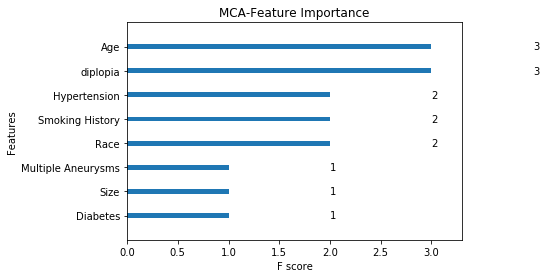

In [188]:
df_RCI_loc=df_RCI[df_RCI['Location']=='MCA']
no_Ruptured_loc = len(df_RCI_loc[df_RCI_loc['Status'] == 'Ruptured'])
unruptured_indices_loc = df_RCI_loc[df_RCI_loc['Status'] == 'Un-Ruptured'].index
random_indices_loc = np.random.choice(unruptured_indices_loc,no_Ruptured_loc,replace=True)
ruptured_indices_loc = df_RCI_loc[df_RCI_loc['Status'] == 'Ruptured'].index
under_sample_indices_loc = np.concatenate([ruptured_indices_loc,random_indices_loc])
df_RCI_balanced_loc = df_RCI.loc[under_sample_indices_loc]                
df_RCI_balanced_loc_X=df_RCI_balanced_loc[RCI_features]
df_RCI_balanced_loc_Y=df_RCI_balanced_loc[RCI_label]

# Rename Columns
df_RCI_balanced_loc_X.rename(index=str, columns={"Size Category (NB)": "Size",
                                'Age Category (Standard)':"Age"  
                                      
                                      },inplace=True)
#Create Encoding
df_RCI_loc_X_balanced_encoded= df_RCI_balanced_loc_X.copy()       
encode = {}
for column in df_RCI_loc_X_balanced_encoded.columns:
    if df_RCI_loc_X_balanced_encoded.dtypes[column] == np.object:
        encode[column] = LabelEncoder()
        df_RCI_loc_X_balanced_encoded[column] = encode[column].fit_transform(df_RCI_loc_X_balanced_encoded[column])
    
    # Test Train Split 
loc_X_train_b, loc_X_val_b, loc_y_train_b, loc_y_val_b = train_test_split(df_RCI_loc_X_balanced_encoded, 
                                                    df_RCI_balanced_loc_Y, test_size=0.10, 
                                                    random_state=1)
    
    # Xtreme Gradient Boost
    
XG_loc_y_train_b=loc_y_train_b['Status'].map({'Un-Ruptured' :0 ,'Ruptured':1})
XG_loc_y_val_b=loc_y_val_b['Status'].map({'Un-Ruptured' :0 ,'Ruptured':1})

useTrainCV=True
cv_folds=7
early_stopping_rounds=50

alg_MCA = XGBClassifier(learning_rate =0.1,n_estimators=1000,max_depth=5,min_child_weight=1,gamma=0,subsample=0.8,
                        colsample_bytree=0.8,objective= 'binary:logistic',nthread=4,scale_pos_weight=1,seed=27,random_state=1)

xgb_param = alg_MCA.get_xgb_params()
xgtrain = xgb.DMatrix(loc_X_train_b, label=XG_loc_y_train_b.values)
cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,metrics='auc', early_stopping_rounds=early_stopping_rounds)
alg_MCA.set_params(n_estimators=cvresult.shape[0])

    #Fit the algorithm on the data
alg_MCA.fit(loc_X_train_b, XG_loc_y_train_b,eval_metric='auc')

    # Predict Test Set 
dtest_predictions = alg_MCA.predict(loc_X_val_b)

print('XGB Accuracy',accuracy_score(XG_loc_y_val_b, dtest_predictions))

plot_importance(alg_MCA,grid=False,title='MCA-Feature Importance')
pyplot.show()

### Location Specific Model - ACoA - XGB

In [80]:
loc_accuracy=loc_specific_model(df_RCI[df_RCI_X['Location']=='Anterior Communicating Artery'],'ACoA',balance=True)
print(loc_accuracy)

'''
Confusion_Matrix 
 [[14  1]
 [ 4  8]]
Classification_Report 
 
               precision    recall  f1-score   support

           0       0.78      0.93      0.85        15
           1       0.89      0.67      0.76        12

    accuracy                           0.81        27
   macro avg       0.83      0.80      0.81        27
weighted avg       0.83      0.81      0.81        27

XGB Accuracy 0.8148148148148148
{'Logistics Regression': 0.6666666666666666, 'DTC': 0.7777777777777778,
'RFC': 0.8888888888888888, 'AdaBoost': 0.6666666666666666, 'GBoost':
0.5925925925925926, 'XGBoost': 0.8148148148148148, 'KNN': 0.8148148148148148}
'''

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packag

Confusion_Matrix 
 [[14  1]
 [ 4  8]]
Classification_Report 
 
               precision    recall  f1-score   support

           0       0.78      0.93      0.85        15
           1       0.89      0.67      0.76        12

    accuracy                           0.81        27
   macro avg       0.83      0.80      0.81        27
weighted avg       0.83      0.81      0.81        27

XGB Accuracy 0.8148148148148148
{'Logistics Regression': 0.6666666666666666, 'DTC': 0.7777777777777778, 'RFC': 0.8888888888888888, 'AdaBoost': 0.6666666666666666, 'GBoost': 0.5925925925925926, 'XGBoost': 0.8148148148148148, 'KNN': 0.8148148148148148}


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


"\n{'Logistics Regression': 0.6666666666666666, 'DTC': 0.7777777777777778, 'RFC': 0.8888888888888888, 'AdaBoost': 0.6666666666666666, 'GBoost': 0.5925925925925926, 'XGBoost': 0.8148148148148148, 'KNN': 0.8148148148148148}\n"

### Feature Importance -ACoA

XGB Accuracy 0.7037037037037037


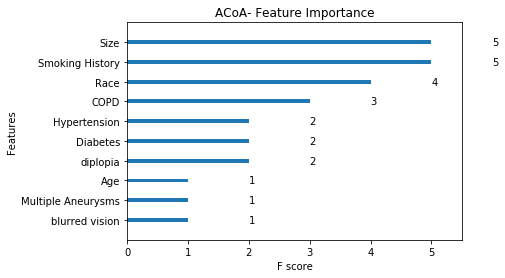

In [189]:
df_RCI_loc=df_RCI[df_RCI['Location']=='Anterior Communicating Artery']
no_Ruptured_loc = len(df_RCI_loc[df_RCI_loc['Status'] == 'Ruptured'])
unruptured_indices_loc = df_RCI_loc[df_RCI_loc['Status'] == 'Un-Ruptured'].index
random_indices_loc = np.random.choice(unruptured_indices_loc,no_Ruptured_loc,replace=True)
ruptured_indices_loc = df_RCI_loc[df_RCI_loc['Status'] == 'Ruptured'].index
under_sample_indices_loc = np.concatenate([ruptured_indices_loc,random_indices_loc])
df_RCI_balanced_loc = df_RCI.loc[under_sample_indices_loc]                
df_RCI_balanced_loc_X=df_RCI_balanced_loc[RCI_features]
df_RCI_balanced_loc_Y=df_RCI_balanced_loc[RCI_label]
   
# Rename Columns
df_RCI_balanced_loc_X.rename(index=str, columns={"Size Category (NB)": "Size",
                                'Age Category (Standard)':"Age"  
                                      
                                      },inplace=True)
# Create Encoding
df_RCI_loc_X_balanced_encoded= df_RCI_balanced_loc_X.copy()       
encode = {}
for column in df_RCI_loc_X_balanced_encoded.columns:
    if df_RCI_loc_X_balanced_encoded.dtypes[column] == np.object:
        encode[column] = LabelEncoder()
        df_RCI_loc_X_balanced_encoded[column] = encode[column].fit_transform(df_RCI_loc_X_balanced_encoded[column])
    
    # Test Train Split 
loc_X_train_b, loc_X_val_b, loc_y_train_b, loc_y_val_b = train_test_split(df_RCI_loc_X_balanced_encoded, 
                                                    df_RCI_balanced_loc_Y, test_size=0.10, 
                                                    random_state=1)
    
    # Xtreme Gradient Boost
    
XG_loc_y_train_b=loc_y_train_b['Status'].map({'Un-Ruptured' :0 ,'Ruptured':1})
XG_loc_y_val_b=loc_y_val_b['Status'].map({'Un-Ruptured' :0 ,'Ruptured':1})

useTrainCV=True
cv_folds=7
early_stopping_rounds=50

alg_ACoA = XGBClassifier(learning_rate =0.1,n_estimators=1000,max_depth=5,min_child_weight=1,gamma=0,subsample=0.8,
                       colsample_bytree=0.8,objective= 'binary:logistic',nthread=4,scale_pos_weight=1,seed=27,random_state=1)


xgb_param = alg_ACoA.get_xgb_params()
xgtrain = xgb.DMatrix(loc_X_train_b, label=XG_loc_y_train_b.values)
cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,metrics='auc', early_stopping_rounds=early_stopping_rounds)
alg_ACoA.set_params(n_estimators=cvresult.shape[0])

#Fit the algorithm on the data
alg_ACoA.fit(loc_X_train_b, XG_loc_y_train_b,eval_metric='auc')

    # Predict Test Set 
dtest_predictions = alg_ACoA.predict(loc_X_val_b)


print('XGB Accuracy',accuracy_score(XG_loc_y_val_b, dtest_predictions))
# Save the Model
pickle.dump(alg_ACoA, open('alg_ACoA', 'wb'))
plot_importance(alg_ACoA,grid=False,title='ACoA- Feature Importance')
pyplot.show()

### Location Specific Model - SICA -XGB

In [114]:
loc_specific_model(df_RCI[df_RCI_X['Location']=='Superaclanoid Internal Carotid Artery'],'SICA',balance=False)
'''
Confusion_Matrix 
 [[14  1]
 [ 5  4]]
Classification_Report 
 
               precision    recall  f1-score   support

           0       0.74      0.93      0.82        15
           1       0.80      0.44      0.57         9

    accuracy                           0.75        24
   macro avg       0.77      0.69      0.70        24
weighted avg       0.76      0.75      0.73        24

XGB Accuracy 0.75

'''

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packag

Confusion_Matrix 
 [[14  1]
 [ 5  4]]
Classification_Report 
 
               precision    recall  f1-score   support

           0       0.74      0.93      0.82        15
           1       0.80      0.44      0.57         9

    accuracy                           0.75        24
   macro avg       0.77      0.69      0.70        24
weighted avg       0.76      0.75      0.73        24

XGB Accuracy 0.75


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


"\n{'Logistics Regression': 0.5454545454545454,\n 'DTC': 0.5909090909090909,\n 'RFC': 0.7272727272727273,\n 'AdaBoost': 0.5909090909090909,\n 'GBoost': 0.5,\n 'XGBoost': 0.7272727272727273,\n 'KNN': 0.45454545454545453}\n\n"

XGB SICA Accuracy 0.5


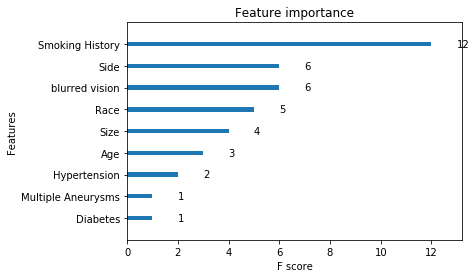

In [190]:
df_RCI_loc=df_RCI[df_RCI['Location']=='Superaclanoid Internal Carotid Artery']
no_Ruptured_loc = len(df_RCI_loc[df_RCI_loc['Status'] == 'Ruptured'])
unruptured_indices_loc = df_RCI_loc[df_RCI_loc['Status'] == 'Un-Ruptured'].index
random_indices_loc = np.random.choice(unruptured_indices_loc,no_Ruptured_loc,replace=True)
ruptured_indices_loc = df_RCI_loc[df_RCI_loc['Status'] == 'Ruptured'].index
under_sample_indices_loc = np.concatenate([ruptured_indices_loc,random_indices_loc])
df_RCI_balanced_loc = df_RCI.loc[under_sample_indices_loc]                
df_RCI_balanced_loc_X=df_RCI_balanced_loc[RCI_features]
df_RCI_balanced_loc_Y=df_RCI_balanced_loc[RCI_label]
  
# Rename Columns
df_RCI_balanced_loc_X.rename(index=str, columns={"Size Category (NB)": "Size",
                                'Age Category (Standard)':"Age"  
                                      
                                      },inplace=True)
# Create Encoding
df_RCI_loc_X_balanced_encoded= df_RCI_balanced_loc_X.copy()       
encode = {}
for column in df_RCI_loc_X_balanced_encoded.columns:
    if df_RCI_loc_X_balanced_encoded.dtypes[column] == np.object:
        encode[column] = LabelEncoder()
        df_RCI_loc_X_balanced_encoded[column] = encode[column].fit_transform(df_RCI_loc_X_balanced_encoded[column])
    
    # Test Train Split 
loc_X_train_b, loc_X_val_b, loc_y_train_b, loc_y_val_b = train_test_split(df_RCI_loc_X_balanced_encoded, 
                                                    df_RCI_balanced_loc_Y, test_size=0.10, 
                                                    random_state=1)
    
    # Xtreme Gradient Boost
    
XG_loc_y_train_b=loc_y_train_b['Status'].map({'Un-Ruptured' :0 ,'Ruptured':1})
XG_loc_y_val_b=loc_y_val_b['Status'].map({'Un-Ruptured' :0 ,'Ruptured':1})

useTrainCV=True
cv_folds=7
early_stopping_rounds=50

alg_SICA = XGBClassifier(learning_rate =0.1,n_estimators=1000,max_depth=5,min_child_weight=1,gamma=0,subsample=0.8,
                        colsample_bytree=0.8,objective= 'binary:logistic',nthread=4,scale_pos_weight=1,seed=27,random_state=1)

xgb_param = alg_SICA.get_xgb_params()
xgtrain = xgb.DMatrix(loc_X_train_b, label=XG_loc_y_train_b.values)
cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,metrics='auc', early_stopping_rounds=early_stopping_rounds)
alg_SICA.set_params(n_estimators=cvresult.shape[0])

    #Fit the algorithm on the data
alg_SICA.fit(loc_X_train_b, XG_loc_y_train_b,eval_metric='auc')

    # Predict Test Set 
dtest_predictions = alg_SICA.predict(loc_X_val_b)
print('XGB SICA Accuracy',accuracy_score(XG_loc_y_val_b, dtest_predictions))

plot_importance(alg_SICA,grid=False)
pyplot.show()

In [126]:
df_RCI[df_RCI_X['Location']=='Superaclanoid Internal Carotid Artery']['Status'].value_counts() 


Un-Ruptured    126
Ruptured       106
Name: Status, dtype: int64

In [198]:
df_RCI[df_RCI_X['Location']=='MCA']['Status'].value_counts()

Un-Ruptured    114
Ruptured        46
Name: Status, dtype: int64

### Location Specific Model - Paraclinoid -XGB 

In [86]:
loc_specific_model(df_RCI[df_RCI_X['Location']=='Paraclinoid'],'Paraclinoid',balance=True)
'''
Confusion_Matrix 
 [[2 1]
 [0 1]]
Classification_Report 
 
               precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.50      1.00      0.67         1

    accuracy                           0.75         4
   macro avg       0.75      0.83      0.73         4
weighted avg       0.88      0.75      0.77         4

XGB Accuracy 0.75
'''

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packag

Confusion_Matrix 
 [[2 1]
 [0 1]]
Classification_Report 
 
               precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.50      1.00      0.67         1

    accuracy                           0.75         4
   macro avg       0.75      0.83      0.73         4
weighted avg       0.88      0.75      0.77         4

XGB Accuracy 0.75


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


"\n{'Logistics Regression': 0.75,\n 'DTC': 0.5,\n 'RFC': 0.75,\n 'AdaBoost': 0.75,\n 'GBoost': 0.75,\n 'XGBoost': 0.75,\n 'KNN': 0.75}\n"

### Feature Importance -Paraclinoid

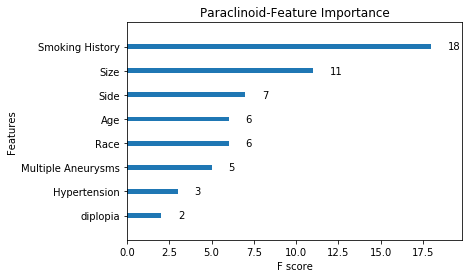

In [191]:
df_RCI_loc=df_RCI[df_RCI['Location']=='Paraclinoid']
no_Ruptured_loc = len(df_RCI_loc[df_RCI_loc['Status'] == 'Ruptured'])
unruptured_indices_loc = df_RCI_loc[df_RCI_loc['Status'] == 'Un-Ruptured'].index
random_indices_loc = np.random.choice(unruptured_indices_loc,no_Ruptured_loc,replace=True)
ruptured_indices_loc = df_RCI_loc[df_RCI_loc['Status'] == 'Ruptured'].index
under_sample_indices_loc = np.concatenate([ruptured_indices_loc,random_indices_loc])
df_RCI_balanced_loc = df_RCI.loc[under_sample_indices_loc]                
df_RCI_balanced_loc_X=df_RCI_balanced_loc[RCI_features]
df_RCI_balanced_loc_Y=df_RCI_balanced_loc[RCI_label]
    
# Rename Columns
df_RCI_balanced_loc_X.rename(index=str, columns={"Size Category (NB)": "Size",
                                'Age Category (Standard)':"Age"  
                                      
                                      },inplace=True)
#Create Encoding
df_RCI_loc_X_balanced_encoded= df_RCI_balanced_loc_X.copy()       
encode = {}
for column in df_RCI_loc_X_balanced_encoded.columns:
    if df_RCI_loc_X_balanced_encoded.dtypes[column] == np.object:
        encode[column] = LabelEncoder()
        df_RCI_loc_X_balanced_encoded[column] = encode[column].fit_transform(df_RCI_loc_X_balanced_encoded[column])
    
    # Test Train Split 
loc_X_train_b, loc_X_val_b, loc_y_train_b, loc_y_val_b = train_test_split(df_RCI_loc_X_balanced_encoded, 
                                                    df_RCI_balanced_loc_Y, test_size=0.10, 
                                                    random_state=1)
    
    # Xtreme Gradient Boost
    
XG_loc_y_train_b=loc_y_train_b['Status'].map({'Un-Ruptured' :0 ,'Ruptured':1})
XG_loc_y_val_b=loc_y_val_b['Status'].map({'Un-Ruptured' :0 ,'Ruptured':1})

useTrainCV=True
cv_folds=7
early_stopping_rounds=50

alg = XGBClassifier(learning_rate =0.1,n_estimators=1000,max_depth=5,min_child_weight=1,gamma=0,subsample=0.8,
                        colsample_bytree=0.8,objective= 'binary:logistic',nthread=4,scale_pos_weight=1,seed=27,random_state=1)

xgb_param = alg.get_xgb_params()
xgtrain = xgb.DMatrix(loc_X_train_b, label=XG_loc_y_train_b.values)
cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,metrics='auc', early_stopping_rounds=early_stopping_rounds)
alg.set_params(n_estimators=cvresult.shape[0])

    #Fit the algorithm on the data
alg.fit(loc_X_train_b, XG_loc_y_train_b,eval_metric='auc')

    # Predict Test Set 
dtest_predictions = alg.predict(loc_X_val_b)


plot_importance(alg,grid=False,title='Paraclinoid-Feature Importance')
pyplot.show()

### Combining All feature Importance into one

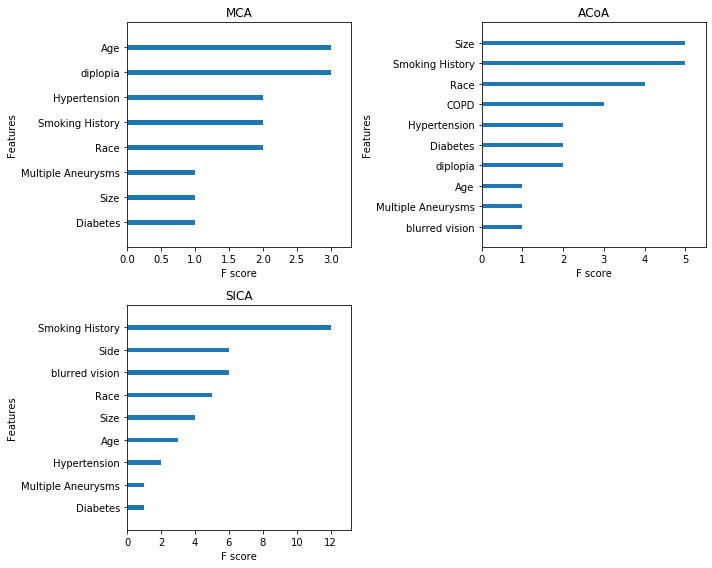

In [215]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(10,8))
plot_importance(alg_MCA,ax=axes[0,0],grid=False,title='MCA',show_values=False)
plot_importance(alg_ACoA,ax=axes[0,1],grid=False,title='ACoA',show_values=False)
plot_importance(alg_SICA,ax=axes[1, 0],grid=False,title='SICA',show_values=False)
#plot_importance(alg,ax=axes[1, 1],grid=False,title='Paraclinoid',show_values=False)
fig.delaxes(axes[1][1])
plt.tight_layout()

fig.savefig('Feature_impprtance.png')

